We need to determine what are the most used keywords and if we can leverage this top x words. As in if there is a correlation between the price of a listing and its popularity and the words used in the title.

In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#import nltk
#To open dialog download:
#nltk.download();
#To downlaod just stopwords:
#nltk.download('stopwords');


import nltk

import nltk.corpus
# two types of stemmers. PorterStemmer algorithm from 1979. PorterStemmer uses Suffix Stripping to produce stems. 

from nltk.stem import PorterStemmer
#PorterStemmer algorithm does not follow linguistics rather a set of 05 rules for different cases that are applied in phases
#(step by step) to generate stems. 
#This is the reason why PorterStemmer does not often generate stems that are actual English words.
#It does not keep a lookup table for actual stems of the word but applies algorithmic rules to generate stems.
#PorterStemmer is known for its simplicity and speed. 

from nltk.stem import LancasterStemmer
#The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally.
#One table containing about 120 rules indexed by the last letter of a suffix. 
#On each iteration, it tries to find an applicable rule by the last character of the word. 
#Each rule specifies either a deletion or replacement of an ending. If there is no such rule, it terminates. 
#It also terminates if a word starts with a vowel and there are only two letters left
#or if a word starts with a consonant and there are only three characters left. 
#Otherwise, the rule is applied, and the process repeats.
#LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. 
#Over-stemming causes the stems to be not linguistic, or they may have no meaning.


from nltk import ne_chunk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
#using pandas library and 'read_csv' function to read csv file 
airbnb=pd.read_csv('listings.csv') #listings.csv , AB_NYC_2019.csv
#examing head of csv file 
#airbnb.head(30)

In [3]:
#checking amount of rows in given dataset to understand the size we are working with
len(airbnb)

48377

In [4]:
#checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis

#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
airbnb.isnull().sum()

id                                   0
name                                17
host_id                              0
host_name                           22
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9651
reviews_per_month                 9651
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['id','host_name'], axis=1, inplace=True)
#examing the changes
airbnb.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
1,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,279,2019-08-29,4.62,1,192
2,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.59,1,13
4,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0
5,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,443,2019-08-27,3.51,1,246
6,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.97,1,0
7,Best Hideaway,7516,Manhattan,East Village,40.72764,-73.97949,Entire home/apt,116,30,94,2016-06-15,0.73,1,347
8,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,161,2019-07-29,1.32,4,0
9,Beautiful 1br on Upper West Side,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,54,2019-08-03,0.43,1,40


In [7]:
#replacing all NaN values in 'reviews_per_month' and 'last_reviews' with 0
airbnb.fillna({'last_review':0}, inplace=True)
airbnb.fillna({'reviews_per_month':0}, inplace=True)


#examing changes
print('reviews per month NaN: ' + str(airbnb.reviews_per_month.isnull().sum()))
print('last reviews NaN: ' + str(airbnb.last_review.isnull().sum()))

reviews per month NaN: 0
last reviews NaN: 0


In [8]:
#finding the top 30 listings with the highest listing price


# need to be worked on
#highest_price = airbnb[["host_id","name", "price"]].head(30)


#Price overall
#sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
#price_sub1=sub_1[['price']]  test = df.sort_values(['one'], ascending=[False])

price_highest_descending = airbnb.sort_values(['price'], ascending=[False]) #head(30)

price_highest_descending.head(10) #30

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16951,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.15,1,0
27780,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0,0.00,1,83
47900,"NYCASA 46, Deluxe King Bed, Steps from it all",287577131,Manhattan,Theater District,40.75849,-73.98289,Private room,10000,1,0,0,0.00,5,365
47901,"NYCASA 46, Two Queen Beds, Steps from it all",287577131,Manhattan,Theater District,40.75767,-73.98410,Private room,10000,1,0,0,0.00,5,365
47899,"NYCASA 46, Deluxe Queen Bed, Steps from it all",287577131,Manhattan,Theater District,40.75883,-73.98279,Private room,10000,1,0,0,0.00,5,365
47897,"NYCASA 46, King Bed, Steps from it all",287577131,Manhattan,Theater District,40.75898,-73.98403,Private room,10000,1,0,0,0.00,5,365
47896,"NYCASA 46, Queen Bed, Steps from it all",287577131,Manhattan,Theater District,40.75874,-73.98383,Private room,10000,1,0,0,0.00,5,365
8744,Furnished room in Astoria apartment,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
11823,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.13,1,83
6234,Spanish Harlem Apt,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0


In [9]:



stop_words = set(stopwords.words('english'))


#initializing empty list where we are going to put our name strings
_names_=[]

#getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
    
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl

#initializing empty list where we are going to have words counted
_names_for_count_=[]

#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)
        

    
no_stop_words = [w for w in _names_for_count_ if not w in stop_words]

lemmatizer = WordNetLemmatizer() 
lemmatized_words = [lemmatizer.lemmatize(w) for w in no_stop_words] #, pos="v" as parameter to lemmatize


In [10]:
lemmatized_words

['village',
 'harlem....new',
 'york',
 '!',
 'cozy',
 'entire',
 'floor',
 'brownstone',
 'entire',
 'apt:',
 'spacious',
 'studio/loft',
 'central',
 'park',
 'large',
 'cozy',
 '1',
 'br',
 'apartment',
 'midtown',
 'east',
 'blissartsspace!',
 'large',
 'furnished',
 'room',
 'near',
 "b'way",
 'cozy',
 'clean',
 'guest',
 'room',
 '-',
 'family',
 'apt',
 'best',
 'hideaway',
 'cute',
 '&',
 'cozy',
 'lower',
 'east',
 'side',
 '1',
 'bdrm',
 'beautiful',
 '1br',
 'upper',
 'west',
 'side',
 'central',
 'manhattan/near',
 'broadway',
 'lovely',
 'room',
 '1,',
 'garden,',
 'best',
 'area,',
 'legal',
 'rental',
 'wonderful',
 'guest',
 'bedroom',
 'manhattan',
 'central',
 'park',
 'west',
 'village',
 'nest',
 '-',
 'superhost',
 '2',
 'stop',
 'manhattan',
 'studio',
 'perfect',
 'parent',
 '+',
 'garden',
 'chelsea',
 'perfect',
 'doti,',
 'airbnb',
 'super',
 'host!',
 'hip',
 'historic',
 'brownstone',
 'apartment',
 'backyard',
 'huge',
 '2',
 'br',
 'upper',
 'east',
 'cent

In [11]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
   # for x in unique_list: 
   #     print(x)
    return unique_list

In [12]:
cleaned_and_lemmatized = []

no_punctuation = [x.translate(str.maketrans('','',string.punctuation)) for x in lemmatized_words] #unique_lemmatized_words

no_digits = [x.translate(str.maketrans('','',"0123456789")) for x in no_punctuation ]
        
for item in no_digits:
    cleaned_and_lemmatized.append(item)

In [13]:
lancaster=LancasterStemmer()
porter = PorterStemmer()

cleaned_and_lemmatized = [i for i in cleaned_and_lemmatized if i] 

#a list to see keywords as unique
unique_meaningful_words = unique(cleaned_and_lemmatized)





In [14]:
#unique_meaningful_words
type(cleaned_and_lemmatized)
cleaned_and_lemmatized

['village',
 'harlemnew',
 'york',
 'cozy',
 'entire',
 'floor',
 'brownstone',
 'entire',
 'apt',
 'spacious',
 'studioloft',
 'central',
 'park',
 'large',
 'cozy',
 'br',
 'apartment',
 'midtown',
 'east',
 'blissartsspace',
 'large',
 'furnished',
 'room',
 'near',
 'bway',
 'cozy',
 'clean',
 'guest',
 'room',
 'family',
 'apt',
 'best',
 'hideaway',
 'cute',
 'cozy',
 'lower',
 'east',
 'side',
 'bdrm',
 'beautiful',
 'br',
 'upper',
 'west',
 'side',
 'central',
 'manhattannear',
 'broadway',
 'lovely',
 'room',
 'garden',
 'best',
 'area',
 'legal',
 'rental',
 'wonderful',
 'guest',
 'bedroom',
 'manhattan',
 'central',
 'park',
 'west',
 'village',
 'nest',
 'superhost',
 'stop',
 'manhattan',
 'studio',
 'perfect',
 'parent',
 'garden',
 'chelsea',
 'perfect',
 'doti',
 'airbnb',
 'super',
 'host',
 'hip',
 'historic',
 'brownstone',
 'apartment',
 'backyard',
 'huge',
 'br',
 'upper',
 'east',
 'cental',
 'park',
 'sweet',
 'spacious',
 'brooklyn',
 'loft',
 'cbg',
 'ctybgd

In [15]:
#we are going to use counter.
#names_for_count
from collections import Counter
#let's see top 30 used words by host to name their listing
top_30_w=Counter(cleaned_and_lemmatized).most_common() #unique_meaningful_words / cleaned_and_lemmatized
top_30_w=top_30_w[0:30]

In [16]:
top_30_w

[('room', 10206),
 ('bedroom', 8170),
 ('private', 7203),
 ('apartment', 6590),
 ('cozy', 4922),
 ('apt', 4493),
 ('brooklyn', 4008),
 ('studio', 3927),
 ('br', 3889),
 ('spacious', 3697),
 ('manhattan', 3321),
 ('park', 3003),
 ('east', 2902),
 ('sunny', 2780),
 ('williamsburg', 2557),
 ('beautiful', 2454),
 ('near', 2341),
 ('village', 2172),
 ('nyc', 2119),
 ('large', 1984),
 ('bed', 1984),
 ('heart', 1972),
 ('loft', 1963),
 ('home', 1824),
 ('central', 1769),
 ('modern', 1765),
 ('min', 1704),
 ('bright', 1688),
 ('luxury', 1605),
 ('w', 1580)]

In [17]:
#now let's put our findings in dataframe for further visualizations
keywordsDF=pd.DataFrame(top_30_w)
keywordsDF.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'br'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, 'park'),
 Text(0, 0, 'east'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'village'),
 Text(0, 0, 'nyc'),
 Text(0, 0, 'large'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'home'),
 Text(0, 0, 'central'),
 Text(0, 0, 'modern'),
 Text(0, 0, 'min'),
 Text(0, 0, 'bright'),
 Text(0, 0, 'luxury'),
 Text(0, 0, 'w')]

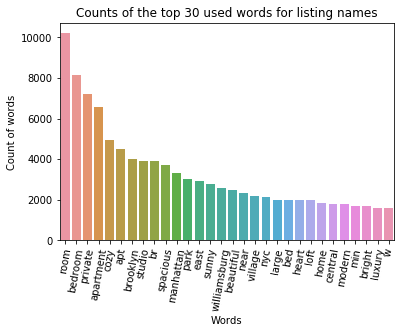

In [18]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=keywordsDF)
viz_5.set_title('Counts of the top 30 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

In [20]:
all_words_from_description = []
def freq_words(x, terms = 30): 
  all_words = ' '.join([str(text) for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  #plt.show()
  return all_words
  




['village',
 'harlemnew',
 'york',
 'cozy',
 'entire',
 'floor',
 'brownstone',
 'entire',
 'apt',
 'spacious',
 'studioloft',
 'central',
 'park',
 'large',
 'cozy',
 'br',
 'apartment',
 'midtown',
 'east',
 'blissartsspace',
 'large',
 'furnished',
 'room',
 'near',
 'bway',
 'cozy',
 'clean',
 'guest',
 'room',
 'family',
 'apt',
 'best',
 'hideaway',
 'cute',
 'cozy',
 'lower',
 'east',
 'side',
 'bdrm',
 'beautiful',
 'br',
 'upper',
 'west',
 'side',
 'central',
 'manhattannear',
 'broadway',
 'lovely',
 'room',
 'garden',
 'best',
 'area',
 'legal',
 'rental',
 'wonderful',
 'guest',
 'bedroom',
 'manhattan',
 'central',
 'park',
 'west',
 'village',
 'nest',
 'superhost',
 'stop',
 'manhattan',
 'studio',
 'perfect',
 'parent',
 'garden',
 'chelsea',
 'perfect',
 'doti',
 'airbnb',
 'super',
 'host',
 'hip',
 'historic',
 'brownstone',
 'apartment',
 'backyard',
 'huge',
 'br',
 'upper',
 'east',
 'cental',
 'park',
 'sweet',
 'spacious',
 'brooklyn',
 'loft',
 'cbg',
 'ctybgd

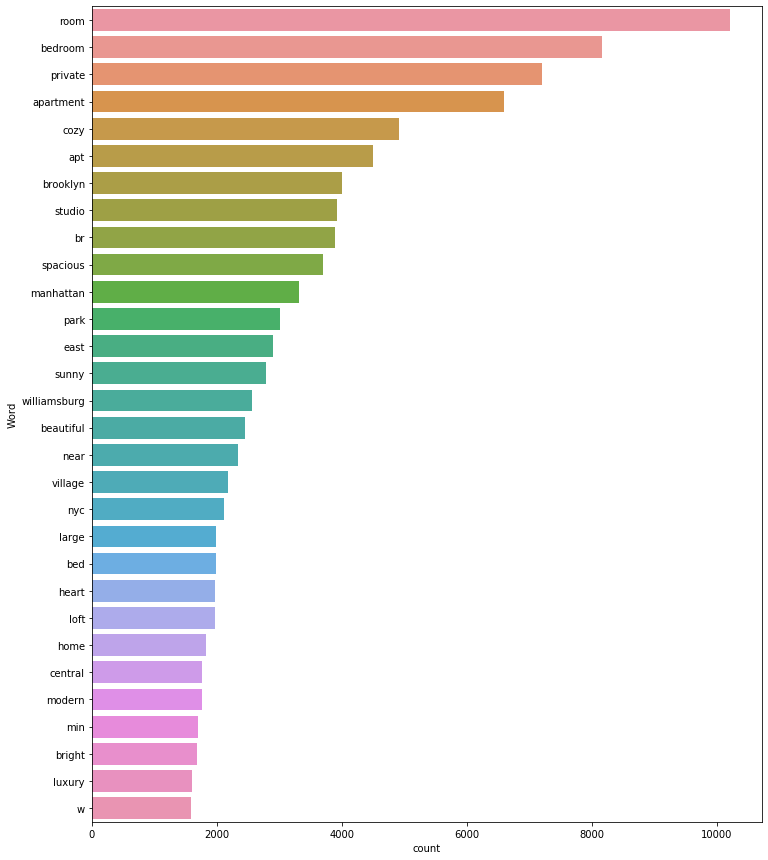

In [21]:
freq_words(cleaned_and_lemmatized)